## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [17]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [18]:
train, test = keras.datasets.cifar10.load_data()

In [19]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [20]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [21]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [22]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [16, 64, 256]
MOMENTUM = 0.95


In [23]:
results = {}
"""
使用迴圈，建立不同 Batch Szie 的模型並訓練
"""
for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Batch size = %.6f" % (bs))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bs, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "bs-%s" % str(bs)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Batch size = 16.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_

50000/50000 [==============================] - 53s 1ms/step - loss: 1.1244 - accuracy: 0.5999 - val_loss: 1.3819 - val_accuracy: 0.5208
Epoch 47/50
50000/50000 [==============================] - 54s 1ms/step - loss: 1.1182 - accuracy: 0.6037 - val_loss: 1.3972 - val_accuracy: 0.5126
Epoch 48/50
50000/50000 [==============================] - 54s 1ms/step - loss: 1.1150 - accuracy: 0.6035 - val_loss: 1.3278 - val_accuracy: 0.5352
Epoch 49/50
50000/50000 [==============================] - 54s 1ms/step - loss: 1.1137 - accuracy: 0.6038 - val_loss: 1.3575 - val_accuracy: 0.5261
Epoch 50/50
50000/50000 [==============================] - 54s 1ms/step - loss: 1.1112 - accuracy: 0.6079 - val_loss: 1.4427 - val_accuracy: 0.5028
Experiment with Batch size = 64.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________________

50000/50000 [==============================] - 17s 349us/step - loss: 0.6149 - accuracy: 0.7792 - val_loss: 1.8855 - val_accuracy: 0.4691
Epoch 41/50
50000/50000 [==============================] - 17s 341us/step - loss: 0.6044 - accuracy: 0.7831 - val_loss: 1.8887 - val_accuracy: 0.4824
Epoch 42/50
50000/50000 [==============================] - 17s 341us/step - loss: 0.5929 - accuracy: 0.7879 - val_loss: 1.9536 - val_accuracy: 0.4782
Epoch 43/50
50000/50000 [==============================] - 17s 342us/step - loss: 0.5925 - accuracy: 0.7874 - val_loss: 1.9837 - val_accuracy: 0.4639
Epoch 44/50
50000/50000 [==============================] - 17s 343us/step - loss: 0.5773 - accuracy: 0.7951 - val_loss: 1.8571 - val_accuracy: 0.4895
Epoch 45/50
50000/50000 [==============================] - 17s 342us/step - loss: 0.5598 - accuracy: 0.7999 - val_loss: 1.9862 - val_accuracy: 0.4747
Epoch 46/50
50000/50000 [==============================] - 17s 342us/step - loss: 0.5429 - accuracy: 0.8059 - va

Epoch 35/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.3885 - accuracy: 0.8752 - val_loss: 1.9896 - val_accuracy: 0.4610
Epoch 36/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.3719 - accuracy: 0.8825 - val_loss: 2.1942 - val_accuracy: 0.4478
Epoch 37/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.3555 - accuracy: 0.8889 - val_loss: 2.1603 - val_accuracy: 0.4588
Epoch 38/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.3401 - accuracy: 0.8933 - val_loss: 2.0753 - val_accuracy: 0.4689
Epoch 39/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.3159 - accuracy: 0.9031 - val_loss: 2.1191 - val_accuracy: 0.4764
Epoch 40/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.3023 - accuracy: 0.9080 - val_loss: 2.3040 - val_accuracy: 0.4631
Epoch 41/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.2908 - accuracy: 0.9123

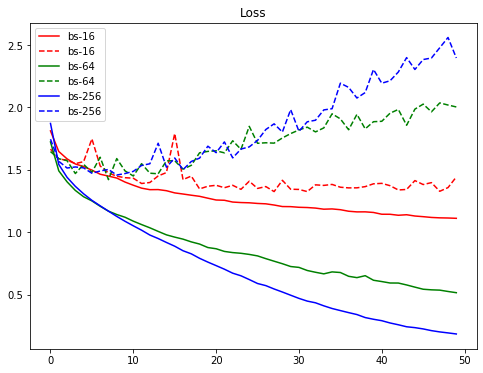

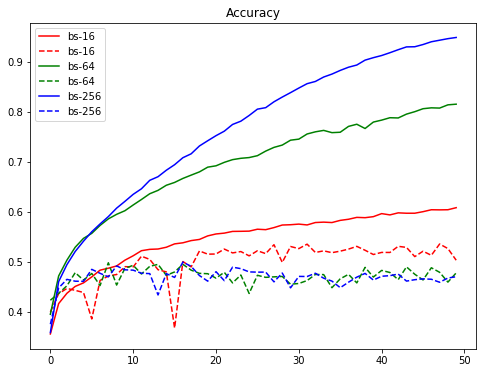

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()